## Support Vector Machine in Mushroom Dataset

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Task 1: Exploratory Data Analysis(EDA)

In [29]:
# Loading Mushroom Dataset using pandas
data=pd.read_csv('mushroom.csv')
data.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [5]:
data.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [30]:
# Searching for missing values
data.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [31]:
#Analysing the target variable distribution
data['class'].value_counts()

poisonous    1400
edible        600
Name: class, dtype: int64

In [32]:
# Searching for duplicate values
data[data.duplicated()]

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
34,1279,bell,smooth,pink,no,foul,notched,distant,broad,pink,...,universal,brown,one,zone,black,scattered,leaves,poisonous,5.291009,5.436304
70,1275,sunken,scaly,yellow,no,pungent,descending,distant,narrow,orange,...,partial,white,none,zone,white,numerous,leaves,poisonous,4.746453,10.769935
76,549,conical,grooves,brown,no,foul,free,distant,broad,white,...,partial,yellow,two,large,chocolate,solitary,woods,poisonous,12.206952,5.061715
109,1198,sunken,smooth,white,no,anise,attached,crowded,broad,black,...,partial,brown,two,sheathing,black,solitary,woods,edible,13.214007,14.549171
127,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,618,flat,grooves,green,yes,musty,notched,crowded,broad,chocolate,...,universal,yellow,one,zone,brown,abundant,meadows,poisonous,14.834383,2.053744
1994,871,flat,scaly,pink,no,spicy,attached,distant,narrow,red,...,universal,brown,two,zone,brown,abundant,meadows,poisonous,4.794826,4.576464
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020


In [9]:
# Drop the duplicate rows
data.drop_duplicates(keep='first',inplace=True,ignore_index=True)
data

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,877,conical,grooves,brown,no,foul,notched,crowded,broad,chocolate,...,universal,brown,none,large,brown,numerous,paths,edible,13.020616,9.993008
972,926,bell,grooves,pink,yes,anise,descending,distant,broad,brown,...,partial,brown,two,pendant,yellow,numerous,grasses,poisonous,3.751597,18.868135
973,289,sunken,smooth,purple,yes,anise,descending,crowded,narrow,buff,...,universal,orange,two,none,orange,abundant,grasses,edible,13.134058,15.740028
974,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957


In [10]:
# Define function for detecting outliers using IQR for all the numerical columns
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Apply outlier removal to all numerical columns
def remove_outliers_all(data):
    for column in data.select_dtypes(include=['float64', 'int64']).columns:
        df = remove_outliers(data, column)
    return data

# Apply the function to the entire dataframe
data_cleaned = remove_outliers_all(data)
data=data_cleaned

# Display the cleaned dataframe
data


,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,877,conical,grooves,brown,no,foul,notched,crowded,broad,chocolate,...,universal,brown,none,large,brown,numerous,paths,edible,13.020616,9.993008
972,926,bell,grooves,pink,yes,anise,descending,distant,broad,brown,...,partial,brown,two,pendant,yellow,numerous,grasses,poisonous,3.751597,18.868135
973,289,sunken,smooth,purple,yes,anise,descending,crowded,narrow,buff,...,universal,orange,two,none,orange,abundant,grasses,edible,13.134058,15.740028
974,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957


In [11]:
numerical_columns = data.select_dtypes(include=['number']).columns.tolist()
numerical_columns

['Unnamed: 0', 'stalk_height', 'cap_diameter']

In [12]:
data.drop('Unnamed: 0', axis=1, inplace=True)

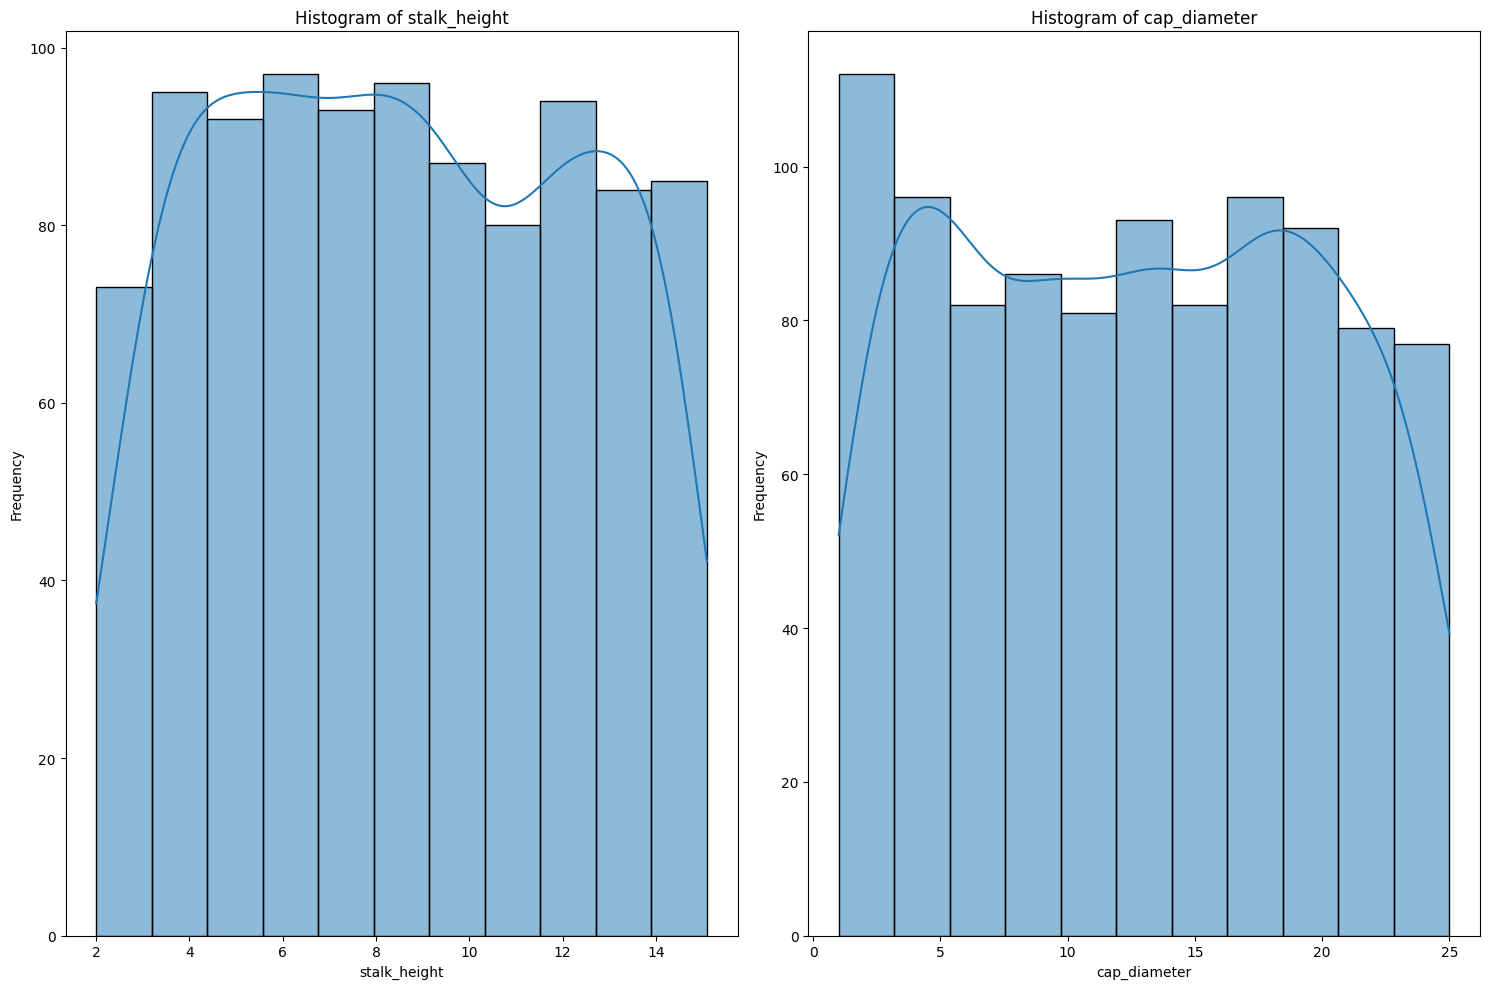

In [13]:
#Plot histograms for the numerical columns
numerical_columns = ['stalk_height','cap_diameter']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, 2, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

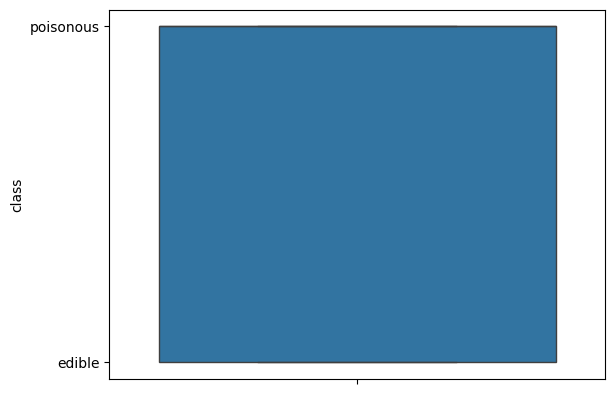

In [14]:
sns.boxplot(data['class'])
plt.show()

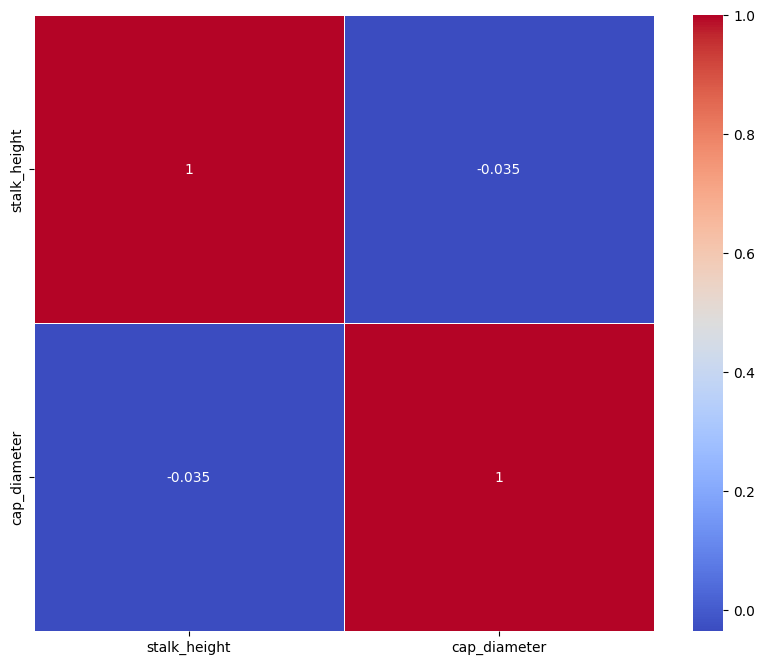

In [15]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

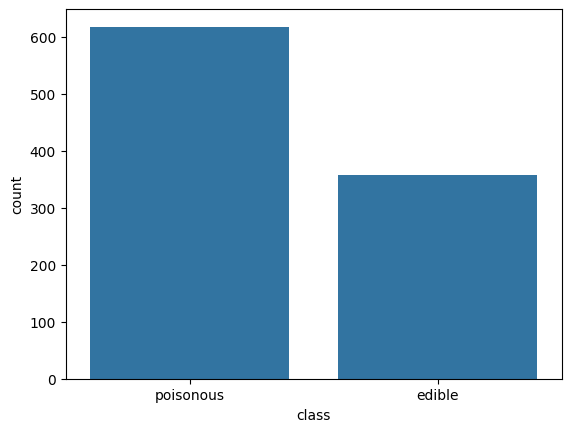

In [16]:
sns.countplot(x='class', data=data)
plt.show()

### Task 2: Data Preprocessing

#### 1. Encoding Categorical variables using Label Encoder 

In [17]:
label_encoder = LabelEncoder()
for column in data.columns:
    data[column] = label_encoder.fit_transform(data[column])

#### 2. Split the data into training and testing sets using train_test_split.

In [18]:
X = data.drop('class', axis=1)
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Task 3: Data Visualization

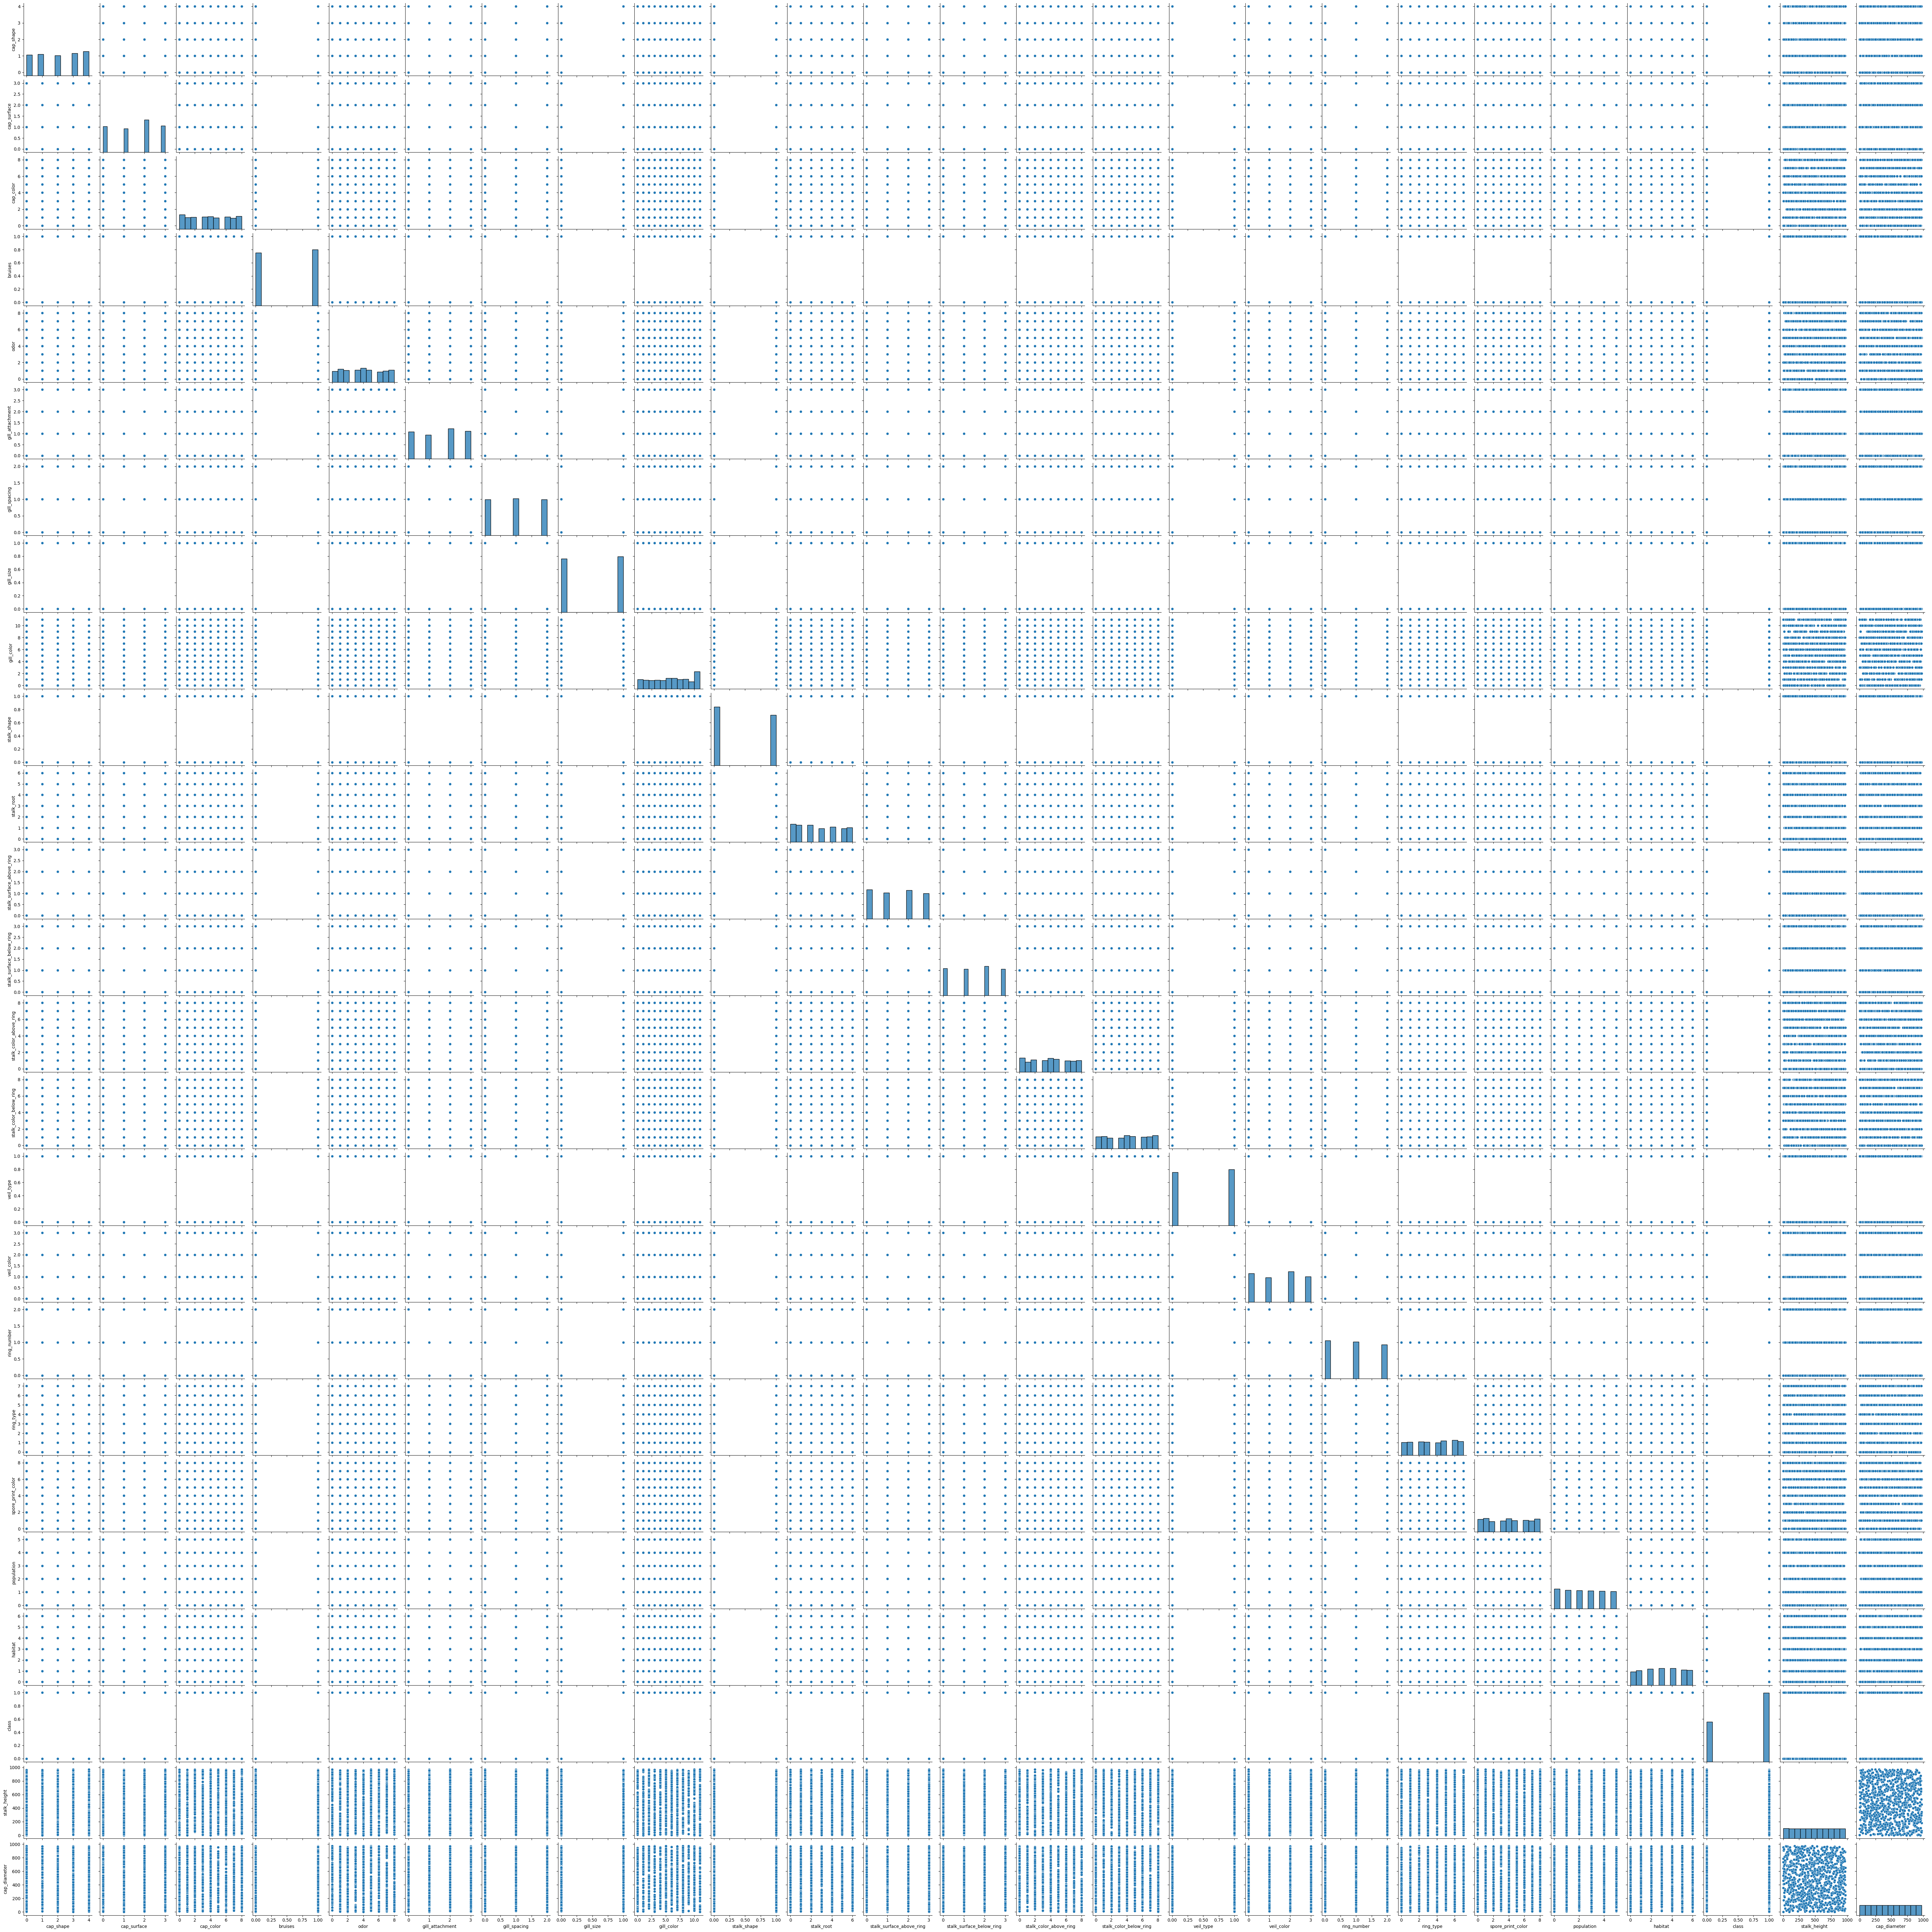

In [19]:
sns.pairplot(data)
plt.show()

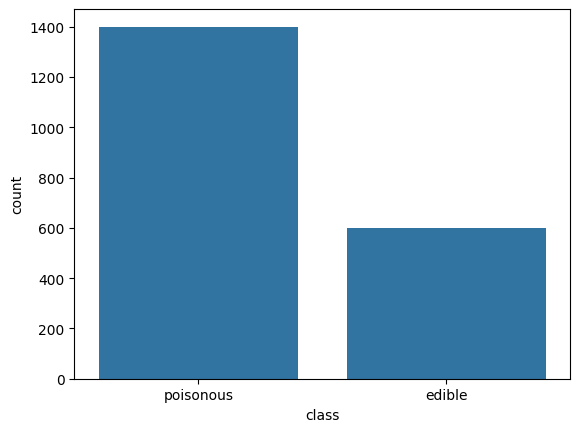

In [33]:
# Class Distribution
sns.countplot(x='class', data=data)
plt.show()

### Task 4: SVM Implementation

##### Basic SVM Classifier

In [21]:
svm_model = SVC(kernel='linear')  # Start with a linear kernel
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [22]:
y_pred = svm_model.predict(X_test)

#### Evaluating performance using metrices such as Accuracy,Precision,Recall and F1 Score

In [23]:
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       106
           1       0.64      1.00      0.78       187

    accuracy                           0.64       293
   macro avg       0.32      0.50      0.39       293
weighted avg       0.41      0.64      0.50       293

Accuracy: 0.6382252559726962


### Task 5: Visualization of SVM Results

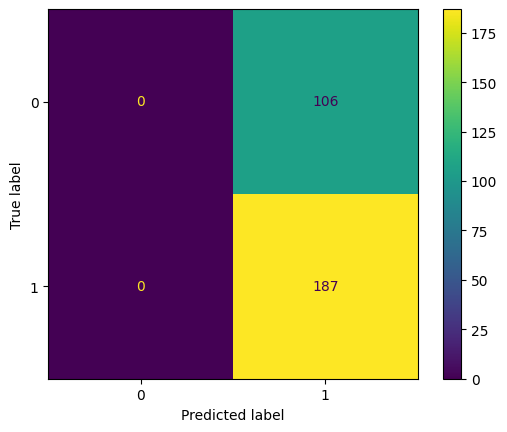

In [25]:
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Task 6: Parameter Tuning and Optimization

In [27]:
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

print(grid.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ...............................C=0.1, kernel=linear; total time=   0.1s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.1s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.1s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.1s
[CV] END .................................C=0.1, kernel=poly; total time=   0.0s
[CV] END .................................C=0.1, kernel=poly; total time=   0.0s
[CV] END .................................C=0.1, kernel=poly; total time=   0.0s
[CV] END .................................C=0.1, kernel=poly; total time=   0.0s
[CV] END .................................C=0.1, kernel=poly; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1,

### Task 7: Comparison and Analysis

#### 1. Kernel Comparison

In [28]:
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Kernel: {kernel}")
    print(classification_report(y_test, y_pred))

Kernel: linear
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       106
           1       0.64      1.00      0.78       187

    accuracy                           0.64       293
   macro avg       0.32      0.50      0.39       293
weighted avg       0.41      0.64      0.50       293

Kernel: poly
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       106
           1       0.64      1.00      0.78       187

    accuracy                           0.64       293
   macro avg       0.32      0.50      0.39       293
weighted avg       0.41      0.64      0.50       293

Kernel: rbf
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       106
           1       0.64      1.00      0.78       187

    accuracy                           0.64       293
   macro avg       0.32      0.50      0.39       293
weighted avg       0.41      0.64 

#### 2. Analyzing SVM Strengths and Weaknesses for the Mushroom Dataset

After performing EDA and visualizations on the Mushroom dataset, certain SVM strengths and weaknesses become apparent:

##### Strengths of SVM
- **Effective for High-Dimensional Data:** SVM performs well in cases where the number of features (dimensions) is large compared to the number of samples, which can be beneficial for the Mushroom dataset, especially if we create many binary features from categorical variables.
- **Ability to Handle Non-Linear Boundaries:** With kernel functions (e.g., RBF), SVM can create non-linear decision boundaries that may be useful in distinguishing between edible and poisonous mushrooms based on complex feature relationships.
- **Versatile Performance with Various Kernels:** The Mushroom dataset has categorical variables that are encoded into numeric values, which can sometimes lead to complex decision boundaries. SVM, with different kernel options, can flexibly handle such data distributions by adjusting decision boundaries.

##### Weaknesses of SVM
- **Sensitivity to Noise and Outliers:** SVM is sensitive to misclassified points or outliers, as these points can affect the margin and support vectors. If any features in the Mushroom dataset contain noisy or mislabeled instances, this may impact SVM performance.
- **Computationally Intensive with Large Datasets:** Although the Mushroom dataset is manageable in size, SVM can become computationally expensive for larger datasets, especially with complex kernels. This can be a consideration if expanding the analysis to larger or more complex datasets.
- **Interpretability Challenges:** SVM models, especially with non-linear kernels, are often hard to interpret directly, which can make it difficult to explain which mushroom features are most critical for classification.

#### 3. Practical Implications of SVM in Real-World Classification Tasks

In real-world classification tasks, SVM has both practical benefits and certain limitations that should be considered when deciding if it’s the right model for a specific problem.

##### Practical Strengths of SVM
- **Effective in Binary and Multi-Class Classification:** SVM is commonly used in binary classification tasks (such as edible vs. poisonous mushrooms), but it can also handle multi-class problems, making it versatile across different classification settings.
- **Robust Generalization Capabilities:** SVM tends to generalize well to unseen data, which is valuable for high-stakes applications like fraud detection, medical diagnosis, and even in fields such as bioinformatics.
- **Kernel Trick for Complex Patterns:** SVM’s use of kernel functions allows it to model complex patterns in data. This is useful in domains like image recognition, where patterns might not be linearly separable and require non-linear decision boundaries.

##### Practical Weaknesses of SVM
- **Limited Suitability for Large Datasets:** SVM models can become slow to train and predict when dealing with large datasets, which limits its applicability for big data applications compared to other classifiers like neural networks or tree-based methods.
- **Challenges in Interpretable Models:** In fields requiring high interpretability (e.g., healthcare, finance), complex SVM models may be less ideal, as it’s often difficult to directly explain how they make predictions. Techniques like SHAP or LIME may be necessary to improve interpretability.
- **Hyperparameter Tuning Complexity:** SVM requires careful tuning of parameters like the regularization parameter \( C \) and kernel-specific parameters. In practice, this can require substantial computational resources, especially when applying cross-validation on large datasets.

##### Application Context
For tasks such as identifying edible and poisonous mushrooms, SVM can offer a robust solution if dataset size and interpretability requirements are manageable. However, for use cases where scalability and model transparency are crucial—such as credit scoring or legal decision-making—SVM might be less suitable unless it is augmented with interpretability tools.